In [1]:
import numpy as np
import pandas as pd
from sklearn .model_selection import train_test_split
import random
from collections import Counter


In [2]:
def load_data():
    df = pd.read_csv("iris.data", header=None)
    df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']
    return df

In [3]:
def divide_data(df, seed):
    # converts the dataframe into list
    data = df.values.tolist()

    # prepares 3 list for each type
    data_setosa = []
    data_versicolor = []
    data_virginica = []

    # assigns each to its list accordingly
    for datum in data:
        if datum[4] == "Iris-setosa":
            data_setosa.append(datum)
        elif datum[4] == "Iris-versicolor":
            data_versicolor.append(datum)
        elif datum[4] == "Iris-virginica":
            data_virginica.append(datum)
            
    # divides the data into input and label
    # gets first 4 columns as input 
    # class label as last column
    X_setosa = [row[:4] for row in data_setosa] 
    Y_setosa = [row[4] for row in data_setosa] 

    ##randomly divides each data by 50/50 train and test while maintaining class balance
    x_setosa_train, x_setosa_test, y_setosa_train, y_setosa_test = train_test_split(X_setosa, Y_setosa, test_size = 0.5, random_state=seed, shuffle=True)


    X_versicolor = [row[:4] for row in data_versicolor] 
    Y_versicolor = [row[4] for row in data_versicolor] 

    x_versicolor_train, x_versicolor_test, y_versicolor_train, y_versicolor_test = train_test_split(X_versicolor, Y_versicolor, test_size = 0.5, random_state=seed, shuffle=True)


    X_virginica = [row[:4] for row in data_virginica] 
    Y_virginica = [row[4] for row in data_virginica]

    x_virginica_train, x_virginica_test, y_virginica_train, y_virginica_test = train_test_split(X_virginica, Y_virginica, test_size = 0.5, random_state=seed, shuffle=True)

    random.seed(seed)
    # merges back the dataset into general x train, y train, x test and y test
    X_train = x_setosa_train + x_versicolor_train + x_virginica_train
    Y_train = y_setosa_train + y_versicolor_train + y_virginica_train

    #shuffles while keeping the order
    combined_train = list(zip(X_train, Y_train))
    random.shuffle(combined_train)
    X_train, Y_train = zip(*combined_train)


    X_test = x_setosa_test + x_versicolor_test + x_virginica_test
    Y_test = y_setosa_test + y_versicolor_test + y_virginica_test
    combined_test = list(zip(X_test, Y_test))
    random.shuffle(combined_test)
    X_test, Y_test = zip(*combined_test)

    return X_train, Y_train, X_test, Y_test

In [4]:

# euclidean distance
def calculate_euclidean_dst(x1, x2):
    total_sum = 0
    for i, j in zip(x1, x2):
        total_sum += (i - j) ** 2
    return np.sqrt(total_sum)


In [5]:
def knn_classify(X_train, Y_train, X_test, K):
    # KNN logic
    predictions = []
    # calculates euclidean distance from new x_test point to all points in training set
    # gets K least distances and gets the majority label class of those and saving it into the predictions list
    for x_test in X_test:
        euclidean_dsts = []
        for index, x_train in enumerate(X_train):
            euclidean_dsts.append([index, calculate_euclidean_dst(x_test, x_train)])
        euclidean_dsts = sorted(euclidean_dsts, key=lambda x: x[1])
        euclidean_dsts = euclidean_dsts[:K]
        
        nearest_neighbor_label = []
        for dst in euclidean_dsts:
            nearest_neighbor_label.append(Y_train[dst[0]])
            
        #gets majority label of K nearest neighbor    
        counter = Counter(nearest_neighbor_label)
        predictions.append(counter.most_common(1)[0][0])
    return predictions
    

In [6]:
def evaluate(predictions, Y_test):
    # evaluation part
    if len(Y_test) != len(predictions):
        print("Prediction size did not match with ground truth labels!")
        
    sample_size = len(Y_test)
    correct_prediction = 0
    for prediction, y_test in zip(predictions, Y_test):
        if prediction == y_test:
            correct_prediction += 1

    return correct_prediction / sample_size
    

In [7]:
def execute_experiment(seed, k):
    df = load_data()
    print(df)

    X_train, Y_train, X_test, Y_test = divide_data(df, seed)

    if len(X_train) == len(X_test) == len(Y_test) == len(Y_train):
        print(f"Length of training and test: {len(X_train)}, {len(X_test)}")
    
    predictions = knn_classify(X_train, Y_train, X_test, k)

    accuracy = evaluate(predictions, Y_test)
    print(f"KNN Accuracy:{accuracy}")
    
    return accuracy


In [8]:
# testing implementations for one time
accuracy = execute_experiment(seed = 42, k = 3)


     Sepal Length  Sepal Width  Petal Length  Petal Width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
Length of training and test: 75, 75
KNN Accuracy:0.9733333333333334


In [9]:
# conducting the experiment 20 times
k = 3
accuracy_k_3 = []
accuracy_k_5 = []
accuracy_k_7 = []
for i in range(20):
    random_seed = random.randint(0, 4294967295)
    accuracy_k_3.append(execute_experiment(random_seed, k = 3))
    accuracy_k_5.append(execute_experiment(random_seed, k = 5))
    accuracy_k_7.append(execute_experiment(random_seed, k = 7))

print(f"Mean accuracy of 20 experiments of k being 3: {np.mean(accuracy_k_3)}")
print(f"Mean accuracy of 20 experiments of k being 5: {np.mean(accuracy_k_5)}")
print(f"Mean accuracy of 20 experiments of k being 7: {np.mean(accuracy_k_7)}")


     Sepal Length  Sepal Width  Petal Length  Petal Width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
Length of training and test: 75, 75
KNN Accuracy:0.9333333333333333
     Sepal Length  S

In [10]:
sum = 0
for accuracy in accuracy_k_3:
    # sum = sum of (x(i) - x_mean)^2
    sum += (accuracy - np.mean(accuracy_k_3)) ** 2
# sum / n-1
sample_variance_knn_3 = sum / 20
print(f"20 Sample variance KNN when k is 3: {sample_variance_knn_3}")

sum = 0
for accuracy in accuracy_k_5:
    # sum = sum of (x(i) - x_mean)^2
    sum += (accuracy - np.mean(accuracy_k_5)) ** 2
# sum / n-1
sample_variance_knn_5 = sum / 20
print(f"20 Sample variance KNN when k is 5: {sample_variance_knn_5}")

sum = 0
for accuracy in accuracy_k_7:
    # sum = sum of (x(i) - x_mean)^2
    sum += (accuracy - np.mean(accuracy_k_7)) ** 2
# sum / n-1
sample_variance_knn_7 = sum / 20
print(f"20 Sample variance KNN when k is 7: {sample_variance_knn_7}")

20 Sample variance KNN when k is 3: 0.0002822222222222228
20 Sample variance KNN when k is 5: 0.0002573333333333339
20 Sample variance KNN when k is 7: 0.0003271111111111115


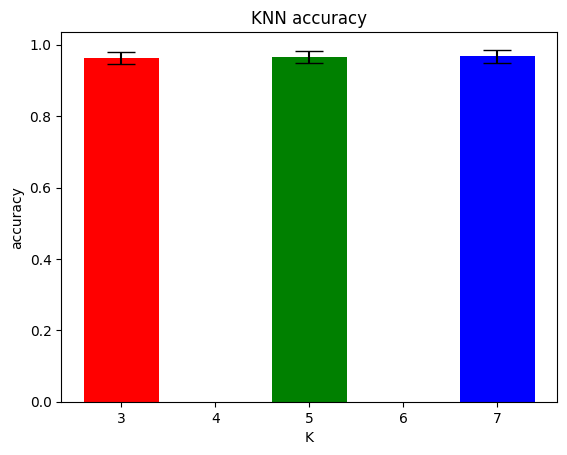

<Figure size 700x400 with 0 Axes>

Mean accuracy: [0.9633333333333333, 0.9659999999999999, 0.968]
Standard deviation: [0.016799470891138885, 0.016041612554021305, 0.018086213288334062]
Variance: [0.0002822222222222228, 0.0002573333333333339, 0.0003271111111111115]


In [13]:
import matplotlib.pyplot as plt

mean_accuracy = []
mean_accuracy.append(np.mean(accuracy_k_3))
mean_accuracy.append(np.mean(accuracy_k_5))
mean_accuracy.append(np.mean(accuracy_k_7))

std_dev = []
std_dev.append(np.std(accuracy_k_3))
std_dev.append(np.std(accuracy_k_5))
std_dev.append(np.std(accuracy_k_7))

variance = []
variance.append(sample_variance_knn_3)
variance.append(sample_variance_knn_5)
variance.append(sample_variance_knn_7)

# mean plot
plt.bar([3, 5, 7], mean_accuracy, yerr=std_dev, capsize=10, color=['red', 'green', 'blue'])
plt.title('KNN accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.figure(figsize=(7, 4))
plt.show()

print(f"Mean accuracy: {mean_accuracy}")
print(f"Standard deviation: {std_dev}")
print(f"Variance: {variance}")